# **Lung-cancer Prediction using Logistic Regression**

In [1]:
# Import necessary libraries

import numpy as np  # Import numpy for numerical computations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting

import math

from sklearn.linear_model import LogisticRegression # Import Logistic Regression model
from sklearn.model_selection import train_test_split # Import function for splitting data into train and test sets
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset from the specified file path
ds = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv') 

# Display the loaded dataset
ds

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
#get all categorical columns
cat_columns = ds.select_dtypes(['object']).columns

#convert all categorical columns to numeric
ds[cat_columns] = ds[cat_columns].apply(lambda x: pd.factorize(x)[0])

# Display the dataset
ds

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,0
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,0
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,0


In [4]:
# Give dataset’s structure and information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [5]:
# returns the number of missing values in the dataset
ds.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
# Calculate the count of each unique value in the 'LUNG_CANCER' column
ds['LUNG_CANCER'].value_counts()

LUNG_CANCER
0    270
1     39
Name: count, dtype: int64

In [7]:
 # Check statistics of dataset
ds.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.475728,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.126214
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [8]:
# Separate features (X) and target variable (y)
# Features: Exclude the 'LUNG_CANCER' column
x = ds.drop(columns=ds.columns[15])

# Target variable: 'LUNG_CANCER' column
y = ds.iloc[:, 15]  # 16th column 

In [9]:
# print the target variable
y

0      0
1      0
2      1
3      1
4      1
      ..
304    0
305    0
306    0
307    0
308    0
Name: LUNG_CANCER, Length: 309, dtype: int64

In [10]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [11]:
# scaling input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [12]:
# convert pandas to numpy array
y_train = y.to_numpy()

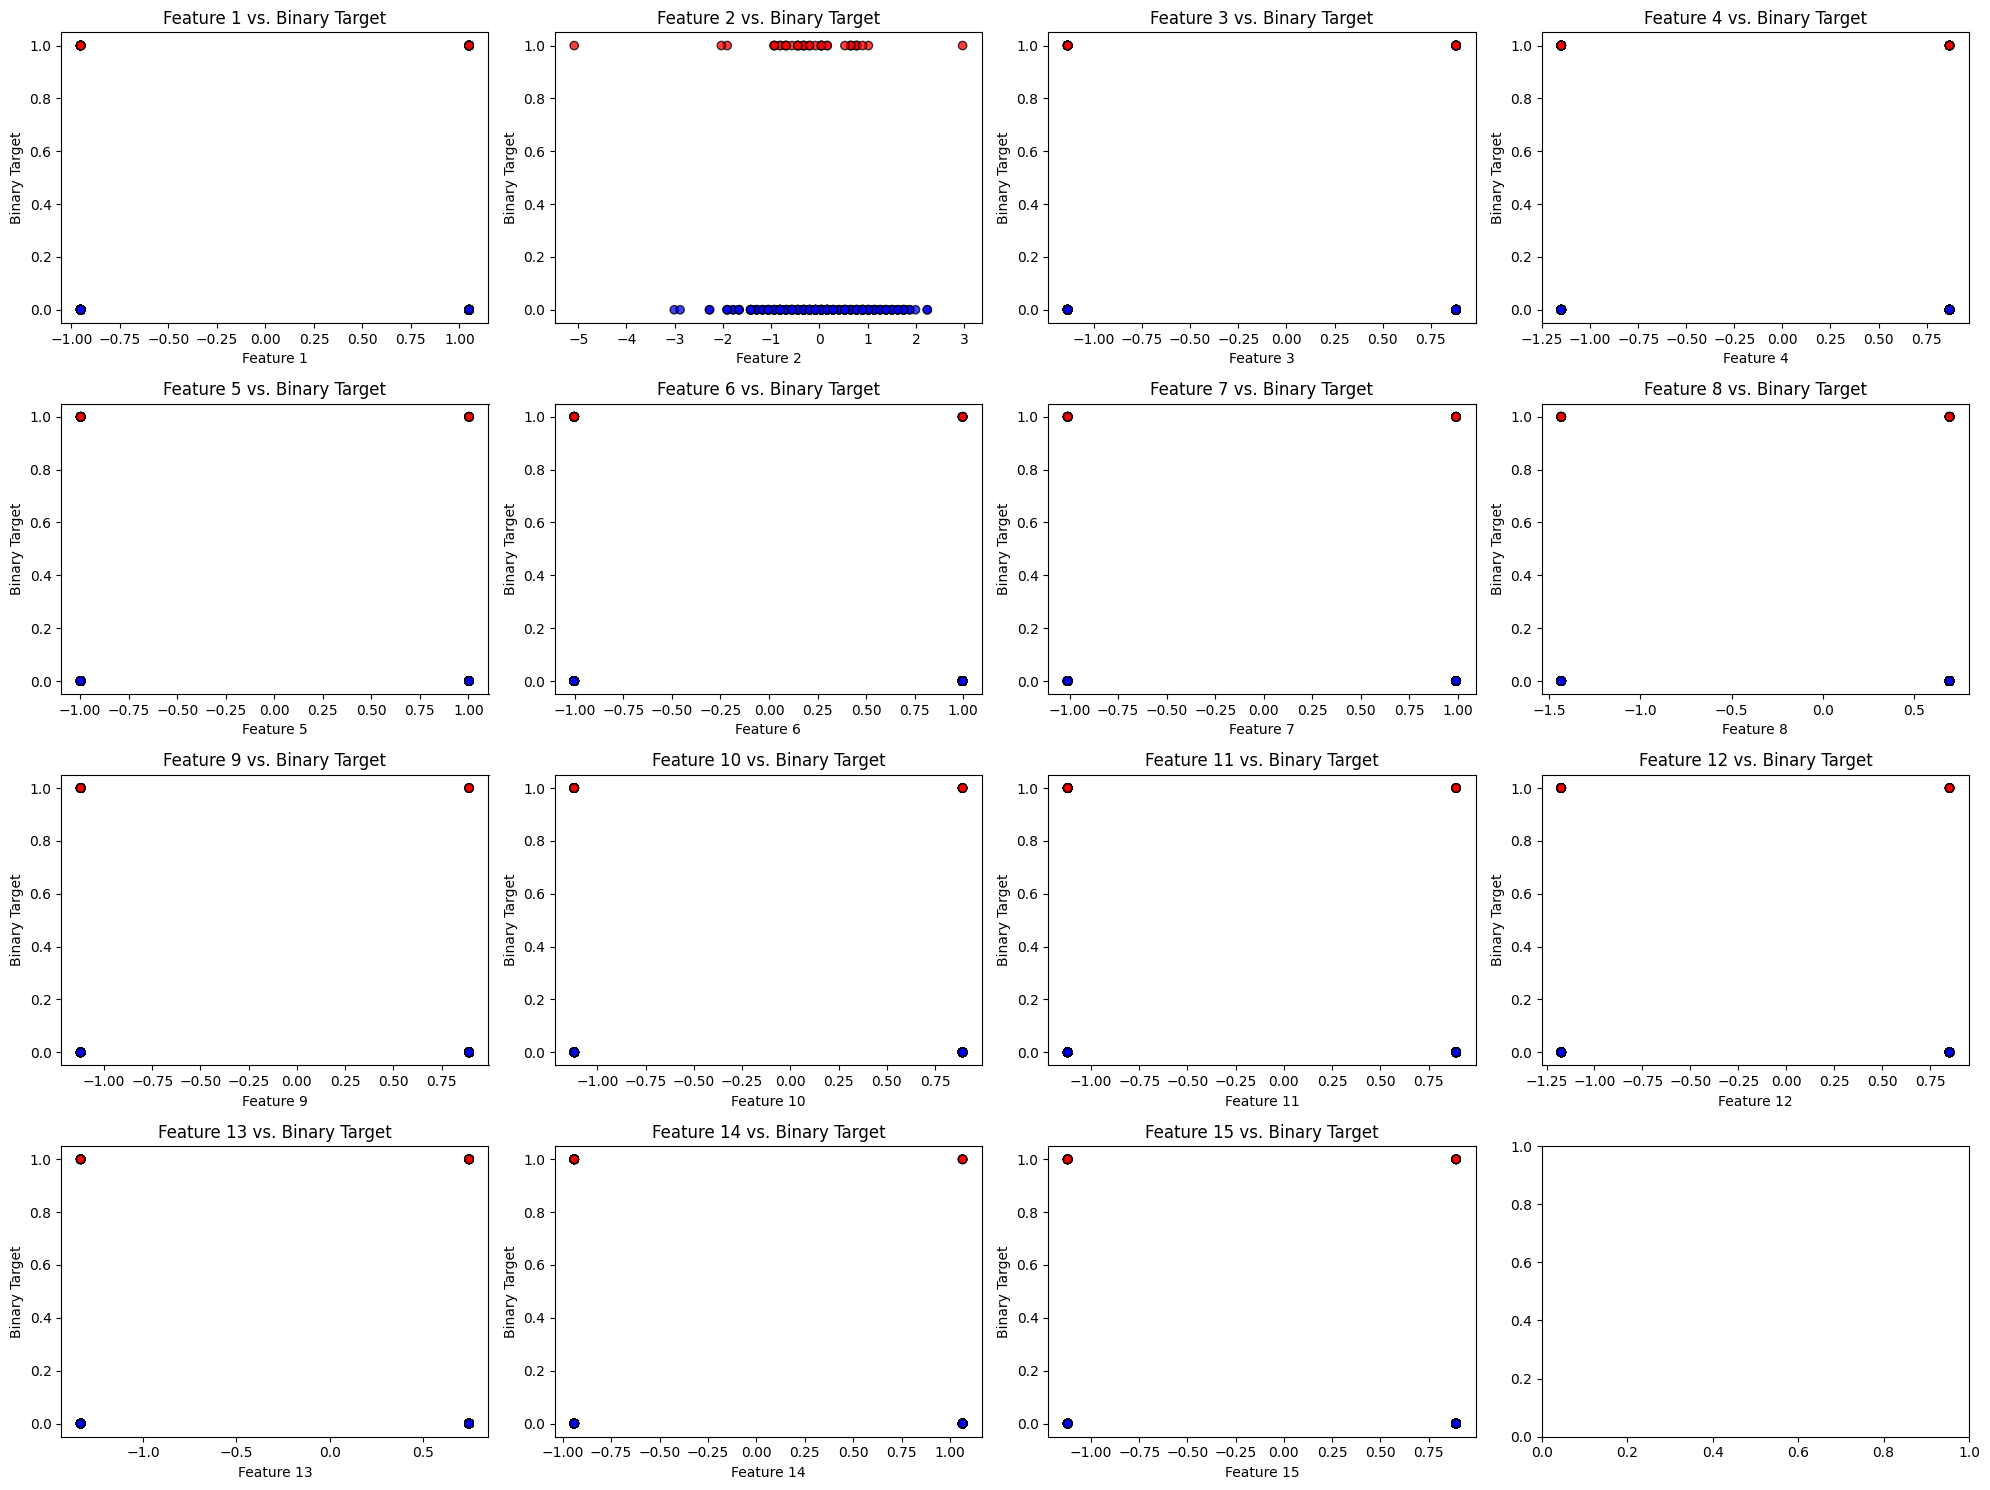

In [13]:
# Data visulation
y_train = y_train.reshape(-1)

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

# Plot each feature against the binary target
for k in range(15):  # We only have 8 subplots, adjust as necessary
    i = k // 4  # Row index
    j = k % 4   # Column index
    axes[i, j].scatter(x[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75, edgecolor='k')
    axes[i, j].set_title(f'Feature {k+1} vs. Binary Target')
    axes[i, j].set_xlabel(f'Feature {k+1}')
    axes[i, j].set_ylabel('Binary Target')
# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y_train, test_size = 0.25, stratify = y_train,random_state = 2)

In [15]:
# view the training variable
print("Elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

print("\n Elements in y_train are:\n", Y_train[:5])
print("Type of y_train:",type(Y_train))

Elements in X_train are:
 [[ 1.04978132 -0.81409477 -1.13529242 -1.15035137 -0.99676897  0.99676897
   0.99033794  0.6968335  -1.12047956 -1.12047956  0.892475    0.85220712
   0.74873631  1.06350105 -1.12047956]
 [-0.95257934  0.16187141 -1.13529242  0.86929961  1.0032415   0.99676897
  -1.00975633  0.6968335   0.892475   -1.12047956 -1.12047956  0.85220712
  -1.33558369  1.06350105 -1.12047956]
 [-0.95257934  0.03987564  0.88083033 -1.15035137 -0.99676897  0.99676897
  -1.00975633 -1.43506304 -1.12047956 -1.12047956 -1.12047956  0.85220712
   0.74873631 -0.94029056 -1.12047956]
 [-0.95257934  1.25983337 -1.13529242 -1.15035137 -0.99676897 -1.0032415
   0.99033794 -1.43506304  0.892475   -1.12047956  0.892475    0.85220712
   0.74873631  1.06350105  0.892475  ]
 [-0.95257934  1.86981223 -1.13529242  0.86929961 -0.99676897  0.99676897
   0.99033794  0.6968335  -1.12047956  0.892475   -1.12047956 -1.17342366
   0.74873631  1.06350105  0.892475  ]]
Type of X_train: <class 'numpy.ndarray'

In [16]:
# Check the dimensions of training variables
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(Y_train.shape))
print ('We have m = %d training examples' % (len(Y_train)))

The shape of X_train is: (231, 15)
The shape of y_train is: (231,)
We have m = 231 training examples


In [17]:
# view the testing variables
print("Elements in x_test are:\n", X_test)
print("Type of X_test:",type(X_test))

print("Elements in y_test are:\n", Y_test)
print("Type of Y_test:",type(Y_test))

Elements in x_test are:
 [[ 1.04978132 -0.44810745  0.88083033 ...  0.74873631 -0.94029056
  -1.12047956]
 [-0.95257934  0.03987564  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [ 1.04978132  1.01584182  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 ...
 [ 1.04978132 -0.32611168  0.88083033 ...  0.74873631  1.06350105
  -1.12047956]
 [-0.95257934  0.03987564  0.88083033 ...  0.74873631 -0.94029056
  -1.12047956]
 [-0.95257934 -0.57010322  0.88083033 ... -1.33558369 -0.94029056
  -1.12047956]]
Type of X_test: <class 'numpy.ndarray'>
Elements in y_test are:
 [1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0]
Type of Y_test: <class 'numpy.ndarray'>


In [18]:
# Check the dimensions of testing variables
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test is: ' + str(Y_test.shape))
print ('We have m = %d testing examples' % (len(Y_test)))

The shape of X_test is: (78, 15)
The shape of y_test is: (78,)
We have m = 78 testing examples


# **Model Training**

In [19]:
# Sigmoid function
def sigmoid(z): 
    g = 1/(1+np.exp(-z)) 
    return g

In [20]:
# Use the sigmoid function implemented above to get the sigmoid values
print ("sigmoid(0) = " + str(sigmoid(0)))

print ("sigmoid([ -2, 0, 1, 2]) = " + str(sigmoid(np.array([-2, 0, 1, 2]))))

sigmoid(0) = 0.5
sigmoid([ -2, 0, 1, 2]) = [0.11920292 0.5        0.73105858 0.88079708]


In [21]:
# Cost Function
def compute_cost(X, y, w, b, lambda_= 1):

    m, n = X.shape
    
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m

    return total_cost

In [22]:
# Compute and display cost with w initialized to zeroes
m, n = X_train.shape

initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, Y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [23]:
# Gradient function
def compute_gradient(x, y, w, b, lambda_=None): 
    m, n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [24]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, Y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.37445887445887444
dj_dw at initial w (zeros):[-0.027309126006086096, 0.03948937819092551, 0.015633785065001907, 0.07196769739796029, 0.06398273884392788, 0.048571963120625866, 0.050479410199898135, 0.04866873190123972, 0.11198591430709848, 0.0814866027172906, 0.09020069174294996, 0.09112344579189444, 0.041260653047749146, 0.07728377124599166, 0.07277251369163117]


In [25]:
# Learning parameters using batgradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1][0]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [26]:
w_init = 0.01 * (np.random.rand(15).reshape(-1,1) - 0.5)  # for 15 features
b_init = -10
alpha = 0.001
num_iters = 5000

# Call gradient descent
w_final, b_final, J_history, w_history = gradient_descent(
    X_train, Y_train, w_init, b_init, compute_cost, compute_gradient, alpha, num_iters)

Iteration    0: Cost     1.26   
Iteration  500: Cost     1.22   
Iteration 1000: Cost     1.18   
Iteration 1500: Cost     1.14   
Iteration 2000: Cost     1.10   
Iteration 2500: Cost     1.06   
Iteration 3000: Cost     1.02   
Iteration 3500: Cost     0.98   
Iteration 4000: Cost     0.94   
Iteration 4500: Cost     0.90   
Iteration 4999: Cost     0.86   


In [27]:
# Evaluating logistic regression
def predict(X, w, b): 
    
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 

        # Loop over each feature
        for j in range(n): 
            z_wb += 0
         
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0

    return p

In [28]:
#Compute accuracy on our testing set
p = predict(X_test, w_final, b_final)
print('Test Accuracy: %f'%(np.mean(p == Y_test) * 100))

Test Accuracy: 87.179487


In [29]:
#Compute accuracy on our testing set
p = predict(X_train, w_final, b_final)
print('Train Accuracy: %f'%(np.mean(p == Y_train) * 100))

Train Accuracy: 87.445887


# **Training the model using scikit learn**

In [30]:
# Initialize a logistic regression model
model = LogisticRegression()

# X_train_new = X_train_new.reshape(-1, 1)
model.fit(X_train, Y_train)

m = X_train.shape[0]
predicted = np.zeros(m)

print(model.coef_)
print(model.intercept_)

[[-0.24911638 -0.31324729 -0.55391535 -0.69895437 -0.72393126 -0.61607158
  -1.14748764 -1.03722613 -1.09032823 -0.60473701 -0.54940879 -1.01205011
  -0.08368954 -0.92109654 -0.55544225]]
[-4.28956314]


In [31]:
predicted = model.predict(X_test)

#accuracy on testing data
accuracy = accuracy_score(Y_test, predicted)

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 91.02564102564102


In [32]:
predicted = model.predict(X_train)

#accuracy on training data
accuracy = accuracy_score(Y_train, predicted)

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 96.1038961038961
